In [1]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import json
import numpy as np
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+notebook'
import os
from urllib import request
import geodata as geo
%config Completer.use_jedi = False
from zipfile import ZipFile
import app_functions as app

## Download Sectors

In [ ]:
list_ufs = ['PE', 'GO', 'AC','AL','AM','AP','BA','CE','DF','ES','MA','MG','MS','MT','PA','PB','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']
#list_ufs = ['GO', 'AC']

In [ ]:
geo.donwload_sectors_shp_2010(ufs=list_ufs)

In [ ]:
geo.download_sector_statistics_2010(ufs=list_ufs)

In [ ]:
#for uf in ['TO', 'PE', 'GO', 'AC']:
for uf in ['AL','AM','AP','BA','CE','DF']:
    #,,'ES','MA','MG','MS','MT','PA','PB','PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['ES','MA','MS','MT','PA','PB']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['MG']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['PI','PR','RN','RO','RR','SC','SE']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['RJ']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [ ]:
for uf in ['RS']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

In [20]:
for uf in ['SP']:
#    ,'PI','PR','RJ','RN','RO','RR','RS','SC','SE']:
    df = geo.treat_sectors_shp(uf=uf)
    geo.save_sectors_geodataframe(gdf=df, uf=uf)
    print(f'{uf} treatment done!')

files saved.
SP treatment done!


In [ ]:
def treat_sectors_shp(uf):
    
    dict_ufs = {
        'RO':'11',
        'AC':'12',
        'AM':'13',
        'RR':'14',
        'PA':'15',
        'AP':'16',
        'TO':'17',
        'MA':'21',
        'PI':'22',
        'CE':'23',
        'RN':'24',
        'PB':'25',
        'PE':'26',
        'AL':'27',
        'SE':'28',
        'BA':'29',
        'MG':'31',
        'ES':'32',
        'RJ':'33',
        'SP':'35',
        'PR':'41',
        'SC':'42',
        'RS':'43',
        'MS':'50',
        'MT':'51',
        'GO':'52',
        'DF':'53'
    }
    
    gdf = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

    gdf = gdf.to_crs("EPSG:5880")

    gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

    gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

    if uf.upper() == 'PE':
        df_pb_pop = pd.read_csv(f'data/pop/setores/PE/PE_20171016/PE/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'ES':
        df_pb_pop = pd.read_csv(f'data/pop/setores/ES/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'TO':
        df_pb_pop = pd.read_csv(f'data/pop/setores/TO/Base informacoes setores2010 universo TO/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'RS':
        df_pb_pop = pd.read_csv(f'data/pop/setores/RS/RS_20150527/RS/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    elif uf.upper() == 'SP':        
        df_pb_pop = pd.read_csv(f'data/pop/setores/SP/Base informaçoes setores2010 universo SP_Capital/CSV/Basico_SP1.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
        df_pb_po2 = pd.read_csv(f'data/pop/setores/SP/SP Exceto a Capital/Base informaçoes setores2010 universo SP_Exceto_Capital/CSV/Basico_SP2.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='utf-8')
        df_pb_pop = pd.concat(objs=[df_pb_pop, df_pb_po2])
    else:
        df_pb_pop = pd.read_csv(f'data/pop/setores/{uf.upper()}/{uf.upper()}/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

    df_pb_pop.columns = ['Cod', 'Pop']

    df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

    df_pb_pop['Pop'].fillna(value=0, inplace=True)

    df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

    gdf['Cod'] = gdf.Cod.astype(np.int64)

    gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

    gdf['Pop'].fillna(value=0, inplace=True)

    gdf['Pop'] = gdf['Pop'].astype(np.int64)

    gdf['Area'] = gdf.area / 10000

    gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

    gdf1 = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

    gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

    gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

    gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

    gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')            
    
    return gdf1

In [17]:
gpd.read_file(f'data/territorio/setores2010/SP/3500105/3500105.shp')

,Cod,TIPO,CD_GEOCODM,NM_MUNICIP,CD_GEOCODB,NM_BAIRRO,ID1,Pop,Area,Pop/ha,geometry
0,350010505000001,URBANO,3500105,ADAMANTINA,None,None,671,304,12.03,25.27,"POLYGON ((-51.07391 -21.69052, -51.07428 -21.6..."
1,350010505000002,URBANO,3500105,ADAMANTINA,None,None,672,785,19.82,39.60,"POLYGON ((-51.07723 -21.68799, -51.07764 -21.6..."
2,350010505000003,URBANO,3500105,ADAMANTINA,None,None,673,519,22.65,22.92,"POLYGON ((-51.07165 -21.68859, -51.07202 -21.6..."
3,350010505000004,URBANO,3500105,ADAMANTINA,None,None,674,788,28.67,27.48,"POLYGON ((-51.06897 -21.69435, -51.06936 -21.6..."
4,350010505000005,URBANO,3500105,ADAMANTINA,None,None,675,813,20.89,38.92,"POLYGON ((-51.07127 -21.69624, -51.07164 -21.6..."
...,...,...,...,...,...,...,...,...,...,...,...
80,350010505000081,URBANO,3500105,ADAMANTINA,None,None,751,416,5.09,81.70,"POLYGON ((-51.05744 -21.70958, -51.05872 -21.7..."
81,350010505000082,URBANO,3500105,ADAMANTINA,None,None,752,0,1.09,0.00,"POLYGON ((-51.06482 -21.70123, -51.06539 -21.6..."
82,350010505000083,URBANO,3500105,ADAMANTINA,None,None,753,79,8.05,9.82,"POLYGON ((-51.06758 -21.70224, -51.06808 -21.7..."
83,350010505000084,URBANO,3500105,ADAMANTINA,None,None,754,22,2.32,9.48,"POLYGON ((-51.07059 -21.70084, -51.07170 -21.6..."


In [10]:
def load_sector_geodataframe(uf,cod_municipio):
    cod_municipio = str(cod_municipio)
    gdf = gpd.read_file(f'data/territorio/setores2010/{uf}/{cod_municipio}/{cod_municipio}.shp')
    return gdf

In [18]:
def plot_density(gdf):
    lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
    lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

    minx, miny, maxx, maxy = gdf.total_bounds
    max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
    zoom = 13 - np.log(max_bound)

    fig_map = px.choropleth_mapbox(
        data_frame=gdf
        , geojson=gdf.geometry
    #    , featureidkey=gdf.index
        , locations=gdf.index
        , color='Pop/ha'
    #    , hover_name='CD_GEOCODI'
        , hover_data=None
        , zoom=zoom
        ,center={"lat": lat, "lon": lon}
        , mapbox_style="carto-positron"
        , title=None
        , template=None
        , width=None
        , height=400
        , opacity=0.3
        )
    
    fig_map.update_layout(margin=dict(l=0, r=0, b=40, t=40))

    return fig_map

In [13]:
gdf = load_sector_geodataframe(uf='SP',cod_municipio=3500105)

C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




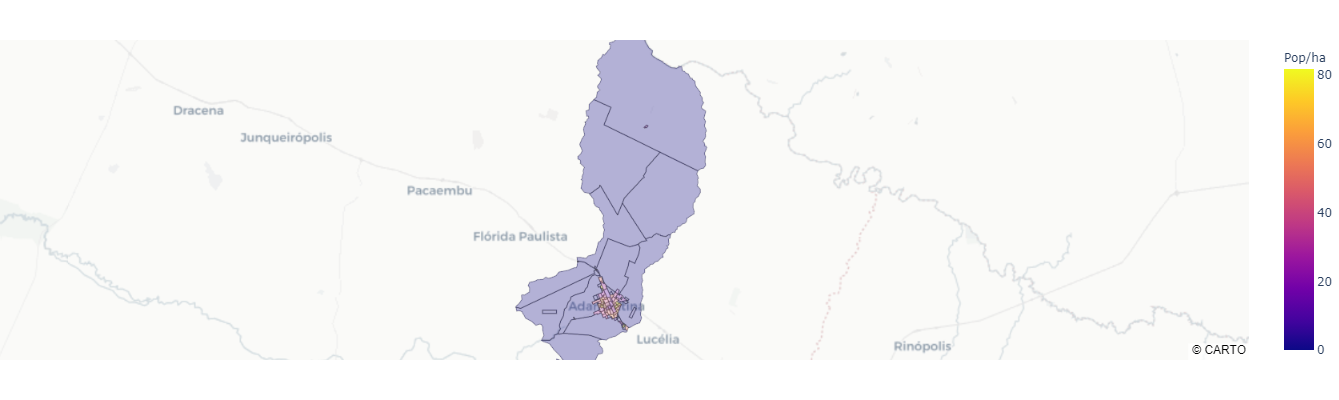

In [19]:
plot_density(gdf=gdf)

## Verificação da função geo.treat_sectors_shp para o caso de São Paulo

In [3]:
lon = gdf[gdf['NM_MUNICIP']=='ADAMANTINA'].dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf[gdf['NM_MUNICIP']=='ADAMANTINA'].dissolve(by='NM_MUNICIP').centroid.y[0]

C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\augus\Anaconda3\envs\aulas\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [8]:
gdf1 = gdf[gdf['NM_MUNICIP']=='ADAMANTINA']

In [11]:
gdf1

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
670,"65,582.00",350010505000001,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,671,"POLYGON ((5302787.574 7597610.472, 5302750.512..."
671,"65,583.00",350010505000002,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,672,"POLYGON ((5302449.649 7597896.465, 5302408.864..."
672,"65,584.00",350010505000003,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,673,"POLYGON ((5303025.534 7597819.740, 5302988.496..."
673,"65,585.00",350010505000004,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,674,"POLYGON ((5303290.673 7597176.327, 5303251.654..."
674,"65,586.00",350010505000005,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,675,"POLYGON ((5303048.740 7596971.024, 5303012.075..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,"65,662.00",350010505000081,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,751,"POLYGON ((5304451.852 7595465.062, 5304320.412..."
751,"65,663.00",350010505000082,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,752,"POLYGON ((5303705.796 7596404.819, 5303649.694..."
752,"65,664.00",350010505000083,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,753,"POLYGON ((5303418.335 7596298.614, 5303368.727..."
753,"65,665.00",350010505000084,URBANO,35001050500,None,350010505,ADAMANTINA,3500105,ADAMANTINA,ADAMANTINA,PRESIDENTE PRUDENTE,None,None,754,"POLYGON ((5303109.713 7596459.335, 5302999.277..."


In [ ]:
gdf1 = gdf1[gdf1['NM_MUNICIP']=='ADAMANTINA']

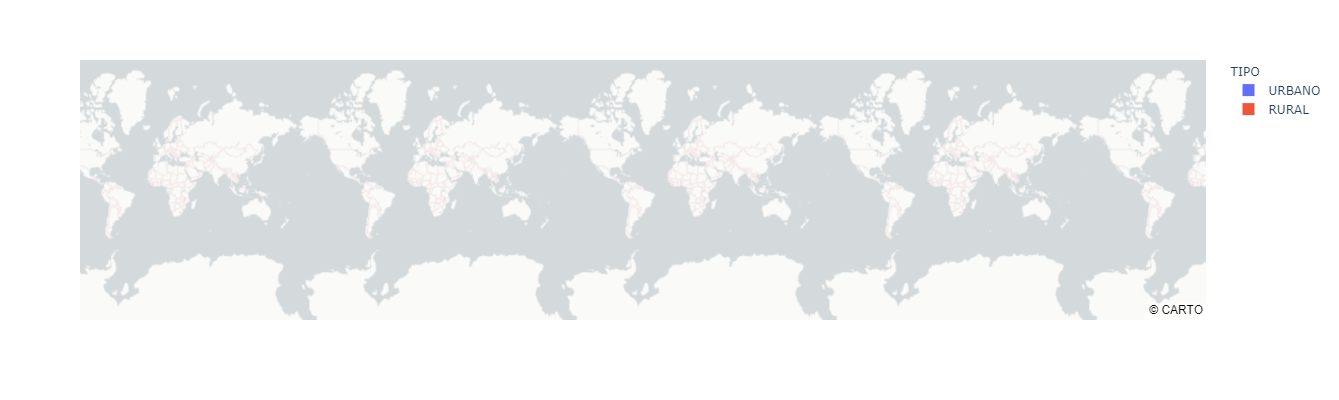

In [9]:
minx, miny, maxx, maxy = gdf1.total_bounds
max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
zoom = 13 - np.log(max_bound)

fig_map = px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='TIPO'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=zoom
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=400
    , opacity=0.3
    )
fig_map.show()

In [6]:
gdf = gpd.read_file('data/territorio/setores2010/SP/35SEE250GC_SIR.shp')

In [7]:
gdf = gdf.to_crs("EPSG:5880")

In [ ]:
gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [ ]:
gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
uf = 'SP'

In [ ]:
if uf.upper() == 'PE':
    df_pb_pop = pd.read_csv(f'data/pop/setores/PE/PE_20171016/PE/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'ES':
    df_pb_pop = pd.read_csv(f'data/pop/setores/ES/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'TO':
    df_pb_pop = pd.read_csv(f'data/pop/setores/TO/Base informacoes setores2010 universo TO/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'RS':
    df_pb_pop = pd.read_csv(f'data/pop/setores/RS/RS_20150527/RS/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
elif uf.upper() == 'SP':        
    df_pb_pop = pd.read_csv(f'data/pop/setores/SP/Base informaçoes setores2010 universo SP_Capital/CSV/Basico_SP1.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')
    df_pb_pop2 = pd.read_csv(f'data/pop/setores/SP/SP Exceto a Capital/Base informaçoes setores2010 universo SP_Exceto_Capital/CSV/Basico_SP2.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='utf-8')
    df_pb_pop = pd.concat(objs=[df_pb_pop, df_pb_pop2])
    df_pb_pop.reset_index(drop=True, inplace=True)
else:
    df_pb_pop = pd.read_csv(f'data/pop/setores/{uf.upper()}/{uf.upper()}/Base informaçoes setores2010 universo {uf.upper()}/CSV/Basico_{uf.upper()}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pb_pop

In [ ]:
df_pb_pop.columns = ['Cod', 'Pop']

In [ ]:
df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

In [ ]:
df_pb_pop['Pop'].fillna(value=0, inplace=True)

In [ ]:
df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

In [ ]:
gdf['Cod'] = gdf.Cod.astype(np.int64)

In [ ]:
gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

In [ ]:
gdf['Pop'].fillna(value=0, inplace=True)

In [ ]:
gdf

In [ ]:
gdf['Pop'] = gdf['Pop'].astype(np.int64)

In [ ]:
gdf['Area'] = gdf.area / 10000

In [ ]:
gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

In [ ]:
gdf.crs

In [ ]:
gdf1 = gpd.read_file(f'data/territorio/setores2010/SP/35SEE250GC_SIR.shp')

In [ ]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [ ]:
gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

In [ ]:
gdf1

In [ ]:
gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')            

In [ ]:
gdf1

In [ ]:
return gdf1

In [ ]:
gdf = gpd.read_file('data/territorio/setores2010/SP/35SEE250GC_SIR.shp')

In [ ]:
gdf = gdf.to_crs("EPSG:5880")

In [ ]:
gdf.area.sum() / 1000000

In [ ]:
fig_map.show()

In [ ]:
gdf_adamantina

In [ ]:
gdf_sj = gpd.read_file('data/territorio/setores2010/MG/3101300/')

In [ ]:
gdf_sj.crs

In [ ]:
gdf_sjp = load_sector_geodataframe(uf='PR',cod_municipio=4125506)

In [ ]:
gdf_sjp.crs

In [ ]:
gdf = load_sector_geodataframe(uf='SP',cod_municipio=3500105)

In [ ]:
gdf.crs

In [ ]:
lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
minx, miny, maxx, maxy = gdf.total_bounds
max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
zoom = 13 - np.log(max_bound)

fig_map = px.choropleth_mapbox(
    data_frame=gdf
    , geojson=gdf.geometry
#    , featureidkey=gdf.index
    , locations=gdf.index
    , color='Pop/ha'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=zoom
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=400
    , opacity=0.3
    )

fig_map.update_layout(margin=dict(l=0, r=0, b=40, t=40))

In [ ]:
def plot_density(gdf):
    lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
    lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

    minx, miny, maxx, maxy = gdf.total_bounds
    max_bound = max(abs(maxx-minx), abs(maxy-miny)) * 111
    zoom = 13 - np.log(max_bound)

    fig_map = px.choropleth_mapbox(
        data_frame=gdf
        , geojson=gdf.geometry
    #    , featureidkey=gdf.index
        , locations=gdf.index
        , color='Pop/ha'
    #    , hover_name='CD_GEOCODI'
        , hover_data=None
        , zoom=zoom
        ,center={"lat": lat, "lon": lon}
        , mapbox_style="carto-positron"
        , title=None
        , template=None
        , width=None
        , height=400
        , opacity=0.3
        )
    
    fig_map.update_layout(margin=dict(l=0, r=0, b=40, t=40))

In [ ]:
df_pb_pop = pd.read_csv(f'data/pop/setores/SP/Base informaçoes setores2010 universo SP_Capital/CSV/Basico_SP1.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pb_po2

In [ ]:
teste = treat_sectors_shp(uf='SP')

In [ ]:
teste

In [ ]:
pd.concat(objs=[df_pb_pop, df_pb_po2])

In [ ]:
treat_sectors_shp(uf='SP')

In [ ]:
def save_sectors_geodataframe(gdf, uf):
    for cod_mun in gdf['CD_GEOCODM'].unique():
        try:
            os.makedirs(f'data/territorio/setores2010/{uf}/{cod_mun}/', exist_ok=True)
            gdf.loc[gdf['CD_GEOCODM'] == cod_mun].to_file(f'data/territorio/setores2010/{uf}/{cod_mun}/{cod_mun}.shp')
        except:
            print(f'Exception while saving {cod_mun}.shp')
    print(f'files saved.')

In [ ]:
df_ac = geo.treat_sectors_shp(uf='AC')

In [ ]:
save_sectors_geodataframe

In [ ]:
df_ac

In [ ]:
def save_sectors_geodataframe(gdf, uf):
    for cod_mun in gdf.CD_GEOCODM.unique():
        try:
            os.makedirs(f'data/territorio/setores2010/{uf}/{cod_mun}/', exist_ok=True)
            gdf.loc[gdf['CD_GEOCODM'] == cod_mun].to_pickle(f'data/territorio/setores2010/{uf}/{cod_mun}/{cod_mun}.pkl')
        except:
            print(f'Exception while saving {cod_mun}.pkl')
    print(f'files saved.')

In [ ]:
save_sectors_geodataframe(gdf=df_ac, uf='AC')

In [ ]:
gdf = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf = gdf[gdf['CD_GEOCODM'] == '2507507']

In [ ]:
120 * 5000

In [ ]:
gdf.info()

In [ ]:
gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf.to_file("data/territorio/2507507.geojson", driver="GeoJSON")

In [ ]:
gdf.columns

In [ ]:
gdf_joao_pessoa = gdf.dissolve(by='NM_MUNICIP')

In [ ]:
long = gdf_joao_pessoa.centroid.x[0]

In [ ]:
lat = gdf_joao_pessoa.centroid.y[0]

In [ ]:
with open("data/territorio/2507507.geojson") as file:
    geojson_mun = json.load(file)

In [ ]:
gdf

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf
    , geojson=geojson_mun
    , featureidkey='properties.CD_GEOCODI'
    , locations='CD_GEOCODI'
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
world = world.to_crs("EPSG:3395")

In [ ]:
gdf1 = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf1 = gdf1[gdf1['NM_MUNICIP'] == 'CAMPINA GRANDE']

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

# PREPARANDO OS DADOS EM GEODATAFRAMES

## Procedimentos para criar o geodata frame e inserir os dados de população para a Paraíba

In [ ]:
gdf_pb = gpd.read_file('data/territorio/25SEE250GC_SIR.shp', encoding='ISO-8859-1')
gdf_pb.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
df_pb = pd.read_csv('data/pop/setores/PB/Basico_PB.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pb

In [ ]:
df_pb.rename(columns={'Cod_setor':'CD_GEOCODI', 'V002':'População'}, inplace=True)

In [ ]:
df_pb['CD_GEOCODI'] = df_pb.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pb['CD_GEOCODI'] = gdf_pb.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pb = gdf_pb.merge(df_pb, on='CD_GEOCODI')

In [ ]:
gdf_pb['População'].isna().sum()

In [ ]:
gdf_pb['População'].fillna(value=0, inplace=True)

In [ ]:
gdf_pb['População'] = gdf_pb['População'].astype(np.int64)

In [ ]:
gdf_pb = gdf_pb.to_crs("EPSG:31985")

In [ ]:
gdf_pb = gdf_pb.loc[gdf_pb['NM_MUNICIP'] == 'JOÃO PESSOA']

In [ ]:
gdf_pb['AREA_HA'] = gdf_pb['geometry'].area / 10000

In [ ]:
gdf_pb['Pop/ha'] = gdf_pb['População'] / gdf_pb['AREA_HA']

In [ ]:
gdf_pb.NM_MUNICIP.unique()

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf_pb
    , geojson=geojson_mun
    , featureidkey='properties.CD_GEOCODI'
    , locations=gdf_pb.index
    , color='Pop/ha'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
gdf_pb.reset_index(drop=True).to_feather('data/territorio/setores_2010_pb.ftd')

## Procedimentos para criar o geodata frame e inserir os dados de população para o Paraná

In [ ]:
gdf_pr = gpd.read_file('data/territorio/41SEE250GC_SIR.shp')
gdf_pr.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
df_pr = pd.read_csv('data/pop/setores/PR/Basico_PR.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pr.rename(columns={'Cod_setor':'CD_GEOCODI', 'V002':'População'}, inplace=True)

In [ ]:
df_pr['CD_GEOCODI'] = df_pr.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pr['CD_GEOCODI'] = gdf_pr.CD_GEOCODI.astype(np.int64)

In [ ]:
gdf_pr = gdf_pr.merge(df_pr, on='CD_GEOCODI')

In [ ]:
gdf_pr['População'].fillna(value=0, inplace=True)

In [ ]:
gdf_pr['População'] = gdf_pr['População'].astype(np.int64)

In [ ]:
gdf_pr

In [ ]:
gdf_pr.reset_index(drop=True).to_feather('data/territorio/setores_2010_pr.ftd')

# Simulando o comportamento da plotagem dos dados no APP

In [ ]:
gdf_pb = gpd.read_feather('data/territorio/setores_2010_pb.ftd')

In [ ]:
gdf_pb.to_

In [ ]:
gdf_pr = gpd.read_feather('data/territorio/setores_2010_pr.ftd')

In [ ]:
gdf_pr = gdf_pr[gdf_pr['CD_GEOCODM'] == '4106902']

In [ ]:
long = gdf_pr.dissolve('CD_GEOCODM').centroid.x[0]
lat = gdf_pr.dissolve('CD_GEOCODM').centroid.y[0]

In [ ]:
fig = px.choropleth_mapbox(
    data_frame=gdf_pr
    , geojson=gdf_pr.geometry
#    , featureidkey=gdf.index
    , locations=gdf_pr.index
    , color='População'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=9.5
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.3
    , color_continuous_scale='Bupu'
)

In [ ]:
fig.show()

In [ ]:
fig.to

In [ ]:
px.colors.sequential.swatches()

## GEEMAP

In [ ]:
import osr

In [ ]:
gdf = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf = gdf.to_crs("EPSG:5880")

In [ ]:
#gdf = gdf.to_crs("EPSG:9001")

In [ ]:
gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [ ]:
gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
df_pb_pop = pd.read_csv('data/pop/setores/PB/Basico_PB.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

In [ ]:
df_pb_pop.columns = ['Cod', 'Pop']

In [ ]:
df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

In [ ]:
df_pb_pop['Pop'].fillna(value=0, inplace=True)

In [ ]:
df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

In [ ]:
df_pb_pop['Pop'].isna().sum()

In [ ]:
gdf['Cod'] = gdf.Cod.astype(np.int64)

In [ ]:
gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

In [ ]:
gdf['Pop'].fillna(value=0, inplace=True)

In [ ]:
gdf['Pop'] = gdf['Pop'].astype(np.int64)

In [ ]:
gdf.area.sum()

In [ ]:
gdf['Area'] = gdf.area / 10000

In [ ]:
gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

In [ ]:
gdf.drop(labels=['AREA_HA'], axis=1, inplace=True)

In [ ]:
lon = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
gdf1 = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

In [ ]:
gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

In [ ]:
gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')

In [ ]:
gdf1 = gdf1[gdf1['CD_GEOCODM'] == '2507507']

In [ ]:
lon = gdf1.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf1.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
gdf1.to_file("teste_gpkg_joao_pessoa.gpkg", driver="GPKG")

In [ ]:
gdf1 = gpd.gpd.read_file("teste_gpkg_joao_pessoa.gpkg")

In [ ]:
lon = gdf.dissolve(by='NM_MUNICIP').to_crs("EPSG:5880").centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').to_crs("EPSG:5880").centroid.y[0]

In [ ]:
fig = px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='Pop/ha'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.3
)

fig.update_geos(fitbounds="geojson", visible=True)

In [ ]:
import plotly.io as pio

In [ ]:
pio.write_json(fig, 'teste_fig_map_joao_pessoa.json')

In [ ]:
pio.read_json('teste_fig_map_joao_pessoa.json')

In [ ]:
gdf.to_file("data/territorio/2507507.geojson", driver="GeoJSON")

In [ ]:
gdf = gdf[gdf['CD_GEOCODM'] == '2507507']

In [ ]:
gdf.columns

In [ ]:
long = gdf.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
long = gdf_joao_pessoa.centroid.x[0]

In [ ]:
lat = gdf_joao_pessoa.centroid.y[0]

In [ ]:
with open("data/territorio/2507507.geojson") as file:
    geojson_mun = json.load(file)

In [ ]:
gdf

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf
    , geojson=geojson_mun
    , featureidkey='properties.CD_GEOCODI'
    , locations='CD_GEOCODI'
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": long}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

In [ ]:
# SIRGAS 2000 / Brazil Polyconic
world = world.to_crs("EPSG:5880")

In [ ]:
gdf1 = gpd.read_file('data/territorio/25SEE250GC_SIR.shp')

In [ ]:
gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

In [ ]:
gdf1 = gdf1[gdf1['NM_MUNICIP'] == 'CAMPINA GRANDE']

In [ ]:
px.choropleth_mapbox(
    data_frame=gdf
    , geojson=gdf.geometry
#    , featureidkey=gdf.index
    , locations=gdf.index
    , color='TIPO'
    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.1
)

Creating Function

In [ ]:
def treat_sectors_shp(ufs):
    
    dict_ufs = {
        'RO':'11',
        'AC':'12',
        'AM':'13',
        'RO':'14',
        'PA':'15',
        'AM':'16',
        'TO':'17',
        'MA':'21',
        'PI':'22',
        'CE':'23',
        'RN':'24',
        'PB':'25',
        'PE':'26',
        'AL':'27',
        'SE':'28',
        'BA':'29',
        'MG':'31',
        'ES':'32',
        'RJ':'33',
        'SP':'35',
        'PR':'41',
        'SC':'42',
        'RS':'43',
        'MS':'50',
        'MT':'51',
        'GO':'52',
        'DF':'53'
    }
    
    for uf in ufs:
        gdf = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

        gdf = gdf.to_crs("EPSG:5880")

        gdf.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

        gdf.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

        df_pb_pop = pd.read_csv(f'data/pop/setores/{uf}/Basico_{uf}.csv', sep=';', usecols=['Cod_setor', 'V002'],encoding='ANSI')

        df_pb_pop.columns = ['Cod', 'Pop']

        df_pb_pop['Cod'] = df_pb_pop.Cod.astype(np.int64)

        df_pb_pop['Pop'].fillna(value=0, inplace=True)

        df_pb_pop['Pop'] = df_pb_pop['Pop'].astype(np.int64)

        gdf['Cod'] = gdf.Cod.astype(np.int64)

        gdf = gdf.merge(df_pb_pop, on='Cod', how='left')

        gdf['Pop'].fillna(value=0, inplace=True)

        gdf['Pop'] = gdf['Pop'].astype(np.int64)

        gdf['Area'] = gdf.area / 10000

        gdf['Pop/ha'] = gdf['Pop'] / gdf['Area']

        gdf.drop(labels=['AREA_HA'], axis=1, inplace=True)

        gdf1 = gpd.read_file(f'data/territorio/setores2010/{uf}/{dict_ufs[uf]}SEE250GC_SIR.shp')

        gdf1.drop(labels=['ID', 'CD_GEOCODS', 'NM_SUBDIST', 'CD_GEOCODD', 'NM_DISTRIT', 'NM_MICRO', 'NM_MESO'], axis=1, inplace=True)

        gdf1.rename(columns={'CD_GEOCODI':'Cod'}, inplace=True)

        gdf1['Cod'] = gdf1['Cod'].astype(np.int64)

        gdf1 = gdf1.merge(right=gdf[['Cod', 'Pop', 'Area', 'Pop/ha']], on='Cod', how='left')            
        
        return gdf1

In [ ]:
def save_sectors_geodataframe(gdf, uf):
    for cod_mun in gdf.CD_GEOCODM.unique():
        os.makedirs(f'data/territorio/setores2010/{uf}/{cod_mun}/', exist_ok=True)
        gdf.loc[gdf['CD_GEOCODM'] == cod_mun].to_pickle(f'data/territorio/setores2010/{uf}/{cod_mun}/{cod_mun}.pkl')
        print(f'{cod_mun}saved.')

In [ ]:
gdf = treat_sectors_shp(ufs=['PB'])

In [ ]:
save_sectors_geodataframe(gdf=gdf, uf='PB')

In [ ]:
gdf1 = pd.read_pickle('data/territorio/setores2010/PB/2507507/2507507.pkl')

In [ ]:
gdf1.to_file("countries.shp")

In [ ]:
lon = gdf1.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf1.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
fig = px.choropleth_mapbox(
    data_frame=gdf1
    , geojson=gdf1.geometry
#    , featureidkey=gdf.index
    , locations=gdf1.index
    , color='Pop/ha'
#    , hover_name='CD_GEOCODI'
    , hover_data=None
    , zoom=11
    ,center={"lat": lat, "lon": lon}
    , mapbox_style="carto-positron"
    , title=None
    , template=None
    , width=None
    , height=None
    , opacity=0.3
)

fig.update_geos(fitbounds="geojson", visible=True)

In [ ]:
import cloudpickle as cp

In [ ]:
from urllib.request import urlopen
zipfile = urlopen("https://github.com/augustogeog/python_demo/blob/30b1ec2dfccfc435b14f3708cd3d021b7c1637f3/data/territorio/setores2010/PB/2500106/2500106.pkl?raw=true", 'rb')

In [ ]:
from urllib.request import urlopen
import pickle
loaded_pickle_object = pickle.loads(urlopen("https://github.com/augustogeog/python_demo/blob/main/data/territorio/setores2010/PB/2500106/2500106.pkl?raw=true", 'rb'))

In [ ]:
gdf1.loc[gdf1['CD_GEOCODM'] == '2507507']['NM_MUNICIP'].unique()[0]

In [ ]:
gdf1 = gdf1.loc[gdf1['NM_MUNICIP'] == 'JOÃO PESSOA']

In [ ]:
gdf1 = treat_sectors_shp(ufs=['PB'])

In [ ]:
gdf1 = gdf1.loc[gdf1['NM_MUNICIP'] == 'JOÃO PESSOA']

In [ ]:
gdf1.to_pickle('teste.zip', compression='zip')

In [ ]:
gdf1.NM_MUNICIP.unique()[0]

In [ ]:
gdf1.info()

In [ ]:
gdf1

In [ ]:
/    gdf1 = gdf1[gdf1['CD_GEOCODM'] == '2507507']

In [ ]:
lon = gdf1.dissolve(by='NM_MUNICIP').centroid.x[0]
lat = gdf1.dissolve(by='NM_MUNICIP').centroid.y[0]

In [ ]:
gdf1.to_file("teste_gpkg_joao_pessoa.gpkg", driver="GPKG")

In [ ]:
gdf1 = gpd.gpd.read_file("teste_gpkg_joao_pessoa.gpkg")